In [239]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# DATA DESCRIPTION

In [240]:
data_description = pd.read_csv('data_information.csv', names=['Name', 'Description'])
data_description

,Name,Description
0,age,age in years
1,sex,sex (1 = male; 0 = female)
2,cp,chest pain type; Value 1: typical angina Value...
3,trestbps,resting blood pressure (in mm Hg on admission ...
4,chol,serum cholestoral in mg/dl
5,fbs,fasting blood sugar > 120 mg/dl (1 = true; 0 =...
6,restecg,resting electrocardiographic results; Value 0:...
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to ...


# RAW DATA

In [241]:
raw = np.loadtxt( 'heart.dat' )

data = pd.DataFrame(raw)
data.columns = data_description['Name'].values
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0


# CATEGORICAL DATA

In [242]:
datacat = pd.read_csv('heartcat.dat', header=None)
datacat.columns = data_description['Name'].values
datacat.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,a4,female,cp4,rb2,sc2,fbs0,hyper,mh2,ang0,op2,flat,nmv3,normal,presence
1,a4,male,cp3,rb0,sc2,fbs0,hyper,mh2,ang0,op1,flat,nmv0,reversible,absence
2,a3,female,cp2,rb1,sc2,fbs0,norm,mh2,ang0,op0,up,nmv0,reversible,presence
3,a3,female,cp4,rb1,sc2,fbs0,norm,mh1,ang1,op0,flat,nmv1,reversible,absence
4,a4,male,cp2,rb1,sc2,fbs0,hyper,mh2,ang1,op0,up,nmv1,normal,absence


# VOCAB

In [243]:
with open('heartvocab.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        vocab = row

vocab

['a0',
 'a1',
 'a2',
 'a3',
 'a4',
 'male',
 'female',
 'cp1',
 'cp2',
 'cp3',
 'cp4',
 'rb0',
 'rb1',
 'rb2',
 'rb3',
 'rb4',
 'sc0',
 'sc1',
 'sc2',
 'fbs0',
 'fbs1',
 'norm',
 'abnormal',
 'hyper',
 'mh0',
 'mh1',
 'mh2',
 'mh3',
 'mh4',
 'mh5',
 'ang0',
 'ang1',
 'op0',
 'op1',
 'op2',
 'op3',
 'op4',
 'op5',
 'op6',
 'up',
 'flat',
 'down',
 'nmv0',
 'nmv1',
 'nmv2',
 'nmv3',
 'normal',
 'fixed',
 'reversible']

# WORD INDEX

In [244]:
# word_index is a dictionary/ vocabulary mapping words to an integer index
word_index = {}
for w in range(len(vocab)):
    word_index[vocab[w]] = {}
    word_index[vocab[w]] = (vocab.index(vocab[w]))

word_index.items()

dict_items([('a0', 0), ('a1', 1), ('a2', 2), ('a3', 3), ('a4', 4), ('male', 5), ('female', 6), ('cp1', 7), ('cp2', 8), ('cp3', 9), ('cp4', 10), ('rb0', 11), ('rb1', 12), ('rb2', 13), ('rb3', 14), ('rb4', 15), ('sc0', 16), ('sc1', 17), ('sc2', 18), ('fbs0', 19), ('fbs1', 20), ('norm', 21), ('abnormal', 22), ('hyper', 23), ('mh0', 24), ('mh1', 25), ('mh2', 26), ('mh3', 27), ('mh4', 28), ('mh5', 29), ('ang0', 30), ('ang1', 31), ('op0', 32), ('op1', 33), ('op2', 34), ('op3', 35), ('op4', 36), ('op5', 37), ('op6', 38), ('up', 39), ('flat', 40), ('down', 41), ('nmv0', 42), ('nmv1', 43), ('nmv2', 44), ('nmv3', 45), ('normal', 46), ('fixed', 47), ('reversible', 48)])

# SPLIT DATA TO X (FEATURES) AND Y (TARGET)

In [245]:
X = datacat.iloc[:,0:13].values
X

array([['a4', 'female', 'cp4', ..., 'flat', 'nmv3', 'normal'],
       ['a4', 'male', 'cp3', ..., 'flat', 'nmv0', 'reversible'],
       ['a3', 'female', 'cp2', ..., 'up', 'nmv0', 'reversible'],
       ...,
       ['a3', 'male', 'cp2', ..., 'flat', 'nmv0', 'normal'],
       ['a3', 'female', 'cp4', ..., 'flat', 'nmv0', 'fixed'],
       ['a4', 'female', 'cp4', ..., 'flat', 'nmv3', 'normal']],
      dtype=object)

In [246]:
y = data['target'].values
y[:5]

array([2., 1., 2., 1., 1.])

# ENCODE DATA

In [247]:
# one hot all docs depend on vocab
X_hot = []
for t in range(len(X)):
    hot = [word_index.get(i, '') for i in X[t]]
    X_hot.append(hot)

X_hot[:5]

[[4, 6, 10, 13, 18, 19, 23, 26, 30, 34, 40, 45, 46],
 [4, 5, 9, 11, 18, 19, 23, 26, 30, 33, 40, 42, 48],
 [3, 6, 8, 12, 18, 19, 21, 26, 30, 32, 39, 42, 48],
 [3, 6, 10, 12, 18, 19, 21, 25, 31, 32, 40, 43, 48],
 [4, 5, 8, 12, 18, 19, 23, 26, 31, 32, 39, 43, 46]]

In [248]:
label_encoder = LabelEncoder()
y_hot = label_encoder.fit_transform(y) # integer_encoded
y_hot[:5]

array([1, 0, 1, 0, 0], dtype=int64)

# RNN

In [249]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [250]:
# # Split data train and test
# split_1 = int(0.8 * len(datacat))
# train_x = X_hot[:split_1]
# test_x = X_hot[split_1:]

# train_y = y_hot[:split_1]
# test_y = y_hot[split_1:]

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hot, y_hot, train_size=0.7, random_state=19)
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.6, random_state=19)

C:\Users\ASUS-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [252]:
type(y_val)

numpy.ndarray

In [253]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print (reverse_word_index)

{0: 'a0', 1: 'a1', 2: 'a2', 3: 'a3', 4: 'a4', 5: 'male', 6: 'female', 7: 'cp1', 8: 'cp2', 9: 'cp3', 10: 'cp4', 11: 'rb0', 12: 'rb1', 13: 'rb2', 14: 'rb3', 15: 'rb4', 16: 'sc0', 17: 'sc1', 18: 'sc2', 19: 'fbs0', 20: 'fbs1', 21: 'norm', 22: 'abnormal', 23: 'hyper', 24: 'mh0', 25: 'mh1', 26: 'mh2', 27: 'mh3', 28: 'mh4', 29: 'mh5', 30: 'ang0', 31: 'ang1', 32: 'op0', 33: 'op1', 34: 'op2', 35: 'op3', 36: 'op4', 37: 'op5', 38: 'op6', 39: 'up', 40: 'flat', 41: 'down', 42: 'nmv0', 43: 'nmv1', 44: 'nmv2', 45: 'nmv3', 46: 'normal', 47: 'fixed', 48: 'reversible'}


In [254]:
for y in range(len(X_train[:2])):
    print(X_train[y])
    tt = ' '.join([reverse_word_index.get(i,'') for i in X_train[y]])
    print (tt)

[3, 6, 10, 14, 18, 19, 23, 26, 31, 35, 41, 42, 48]
a3 female cp4 rb3 sc2 fbs0 hyper mh2 ang1 op3 down nmv0 reversible
[3, 5, 10, 13, 18, 19, 23, 26, 31, 32, 40, 42, 46]
a3 male cp4 rb2 sc2 fbs0 hyper mh2 ang1 op0 flat nmv0 normal


In [255]:
X_train[0]

[3, 6, 10, 14, 18, 19, 23, 26, 31, 35, 41, 42, 48]

In [256]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [257]:
# create the model RNN
model = Sequential()
model.add(Embedding(len(vocab), 10, input_length=(len(X_train[0]))))
model.add(GRU(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)
#f =model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 13, 10)            490       
_________________________________________________________________
gru_23 (GRU)                 (None, 10)                630       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________
None
Train on 189 samples, validate on 49 samples
Epoch 1/100
189/189 [==============================] - 2s 11ms/step - loss: 0.6948 - acc: 0.3228 - val_loss: 0.6936 - val_acc: 0.5306
Epoch 2/100
189/189 [==============================] - 0s 127us/step - loss: 0.6933 - acc: 0.5450 - val_loss: 0.6924 - val_acc: 0.5714
Epoch 3/100
189/189 [==============================] - 0s 132us/step - loss: 0.6921 -

189/189 [==============================] - 0s 137us/step - loss: 0.3426 - acc: 0.8571 - val_loss: 0.3513 - val_acc: 0.8980
Epoch 56/100
189/189 [==============================] - 0s 95us/step - loss: 0.3356 - acc: 0.8571 - val_loss: 0.3483 - val_acc: 0.8980
Epoch 57/100
189/189 [==============================] - 0s 90us/step - loss: 0.3315 - acc: 0.8624 - val_loss: 0.3473 - val_acc: 0.8980
Epoch 58/100
189/189 [==============================] - 0s 84us/step - loss: 0.3283 - acc: 0.8677 - val_loss: 0.3461 - val_acc: 0.8776
Epoch 59/100
189/189 [==============================] - 0s 90us/step - loss: 0.3240 - acc: 0.8624 - val_loss: 0.3463 - val_acc: 0.8776
Epoch 60/100
189/189 [==============================] - 0s 137us/step - loss: 0.3181 - acc: 0.8677 - val_loss: 0.3504 - val_acc: 0.8776
Epoch 61/100
189/189 [==============================] - 0s 116us/step - loss: 0.3152 - acc: 0.8730 - val_loss: 0.3511 - val_acc: 0.8776
Epoch 62/100
189/189 [==============================] - 0s 90us/s

In [258]:
# Final evaluation of the model
loss, score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score*100))
print("Log loss: ", loss)

Accuracy: 81.25%
Log loss:  0.28978919982910156


In [271]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.9554655870445344

In [264]:
# create the model RNN
model2 = Sequential()
model2.add(Embedding(len(vocab), 10, input_length=(len(X_train[0]))))
model2.add(GRU(10, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

# Train
f = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 13, 10)            490       
_________________________________________________________________
gru_25 (GRU)                 (None, 10)                630       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 1,131
Trainable params: 1,131
Non-trainable params: 0
_________________________________________________________________
None
Train on 189 samples, validate on 49 samples
Epoch 1/100
189/189 [==============================] - 2s 12ms/step - loss: 0.6908 - acc: 0.7196 - val_loss: 0.6899 - val_acc: 0.7551
Epoch 2/100
189/189 [==============================] - 0s 95us/step - loss: 0.6887 - acc: 0.7354 - val_loss: 0.6878 - val_acc: 0.6327
Epoch 3/100
189/189 [==============================] - 0s 116us/step - loss: 0.6867 - 

189/189 [==============================] - 0s 95us/step - loss: 0.3297 - acc: 0.8730 - val_loss: 0.3555 - val_acc: 0.8776
Epoch 56/100
189/189 [==============================] - 0s 84us/step - loss: 0.3257 - acc: 0.8677 - val_loss: 0.3582 - val_acc: 0.8776
Epoch 57/100
189/189 [==============================] - 0s 95us/step - loss: 0.3236 - acc: 0.8677 - val_loss: 0.3628 - val_acc: 0.8776
Epoch 58/100
189/189 [==============================] - 0s 90us/step - loss: 0.3206 - acc: 0.8836 - val_loss: 0.3671 - val_acc: 0.8571
Epoch 59/100
189/189 [==============================] - 0s 95us/step - loss: 0.3174 - acc: 0.8836 - val_loss: 0.3694 - val_acc: 0.8571
Epoch 60/100
189/189 [==============================] - 0s 127us/step - loss: 0.3158 - acc: 0.8836 - val_loss: 0.3722 - val_acc: 0.8571
Epoch 61/100
189/189 [==============================] - 0s 169us/step - loss: 0.3139 - acc: 0.8836 - val_loss: 0.3742 - val_acc: 0.8571
Epoch 62/100
189/189 [==============================] - 0s 132us/s

In [265]:
loss2, score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' % (score2*100))
print('Log loss:', loss2)

Accuracy: 87.50%
Log loss: 0.2360730767250061


In [266]:
from sklearn.metrics import roc_auc_score

y_pred = model2.predict(X_test)
roc_auc_score(y_test, y_pred)

0.97165991902834

# PLOTTING HISTORY

In [267]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

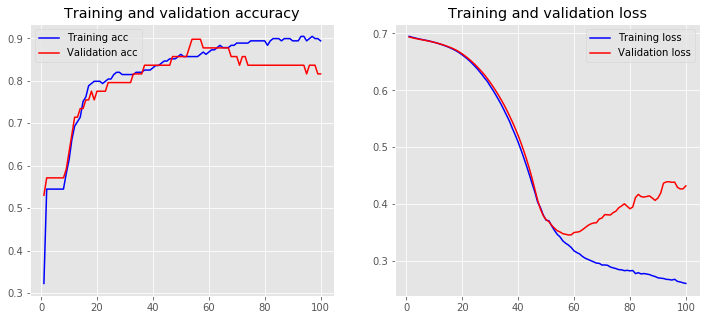

In [269]:
plot_history(h)

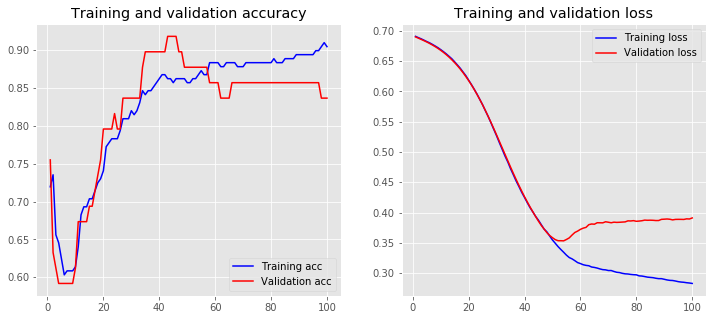

In [268]:
plot_history(f)